# PROJECT BY JOY AKINYI
## INTRODUCTION

    > This project aims to analyse the Kenyan dataset specifically  the Nairobi State and draw geographical analysations in regards to the same and 

In [2]:
# importing necessary libraries
import pandas as pd
import geopandas as gpd
import seaborn as sns
import json
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#Loading the json file
with open ('downloads/KEN_AL2_Kenya_GEZ.json') as f:
    data=json.load(f)
    

> EXTRACTING THE ZIP FILES

In [3]:
import zipfile
#Extracting the zipfile
zip_path=('Downloads/KEN-20230329T104504Z-001.zip')
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('./')

biome_nairobi=gpd.read_file('KEN/KEN_AL4_Nairobi_GEZ.json')
biome_nairobi.tail()

,country,ISO3166_2,name,gez_name,gez_code,gez_abbrev,adminlevel,geometry
0,KEN,KE-30,Nairobi,Tropical mountain system,16,TM,4,"POLYGON ((37.10309 -1.26118, 37.10088 -1.26435..."


In [4]:
zip_path=('Downloads/Climate-20230328T213732Z-001.zip')
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('./')

In [5]:
#Extracting the zipfile
zip_path=('Downloads/KEN-20230329T152437Z-001.zip')
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('./')

In [6]:
zip_paths=('Climate/KoppenGeigerClimateShifts.zip')
with zipfile.ZipFile(zip_path, 'r') as zips_ref:
    zips_ref.extractall('./')

In [7]:
#Extracting the zipfile
zip_path=('Downloads/KEN-20230329T151951Z-001.zip')
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('./')


In [8]:
#Changing it to a dataframe
df_AL2=pd.DataFrame(data)
df_AL2.head()

,type,name,features
0,FeatureCollection,KEN_AL2_Kenya_GEZ.json,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
1,FeatureCollection,KEN_AL2_Kenya_GEZ.json,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
2,FeatureCollection,KEN_AL2_Kenya_GEZ.json,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
3,FeatureCollection,KEN_AL2_Kenya_GEZ.json,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
4,FeatureCollection,KEN_AL2_Kenya_GEZ.json,"{'type': 'Feature', 'geometry': {'type': 'Mult..."


In [9]:
biome_df=gpd.read_file('Downloads/KEN_AL2_Kenya_GEZ.json')
biome_df.head()


,country,ISO3166_2,name,gez_name,gez_code,gez_abbrev,adminlevel,geometry
0,KEN,,Kenya,Tropical dry forest,13,TAwb,2,"MULTIPOLYGON (((34.76935 -0.29384, 34.76875 -0..."
1,KEN,,Kenya,Tropical moist forest,12,TAwa,2,"MULTIPOLYGON (((39.59500 -4.06283, 39.59465 -4..."
2,KEN,,Kenya,Tropical mountain system,16,TM,2,"MULTIPOLYGON (((38.45417 -3.34256, 38.41297 -3..."
3,KEN,,Kenya,Tropical rainforest,11,TAr,2,"MULTIPOLYGON (((39.22227 -4.66908, 39.22226 -4..."
4,KEN,,Kenya,Tropical shrubland,14,TBSh,2,"MULTIPOLYGON (((36.41257 -1.41796, 36.38317 -1..."


### BIOME DISTRIBUTION

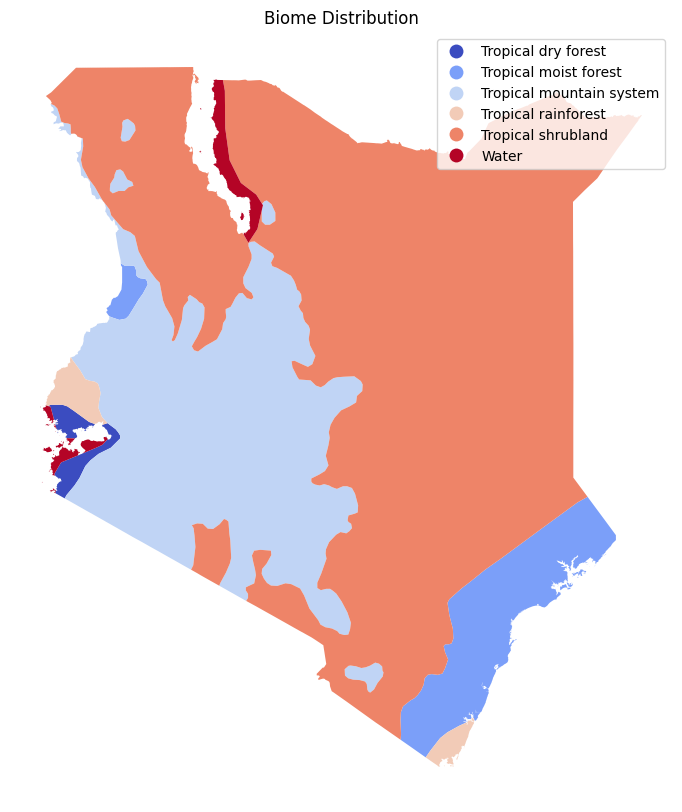

In [10]:
# Create a choropleth map using matplotlib
fig, ax = plt.subplots(figsize=(10,10))
biome_df.plot(column='gez_name', cmap='coolwarm', ax=ax,legend=True)
ax.set_title('Biome Distribution')
ax.set_axis_off()
plt.show()


We can conclude that majority of Kenya experiences or has tropical shrubland while the least is water

### Biome distribution in Nairobi

In [11]:
biome_nairobi=gpd.read_file('Downloads/KEN_AL4_Nairobi_GEZ.json')
biome_nairobi.head()


,country,ISO3166_2,name,gez_name,gez_code,gez_abbrev,adminlevel,geometry
0,KEN,KE-30,Nairobi,Tropical mountain system,16,TM,4,"POLYGON ((37.10309 -1.26118, 37.10088 -1.26435..."


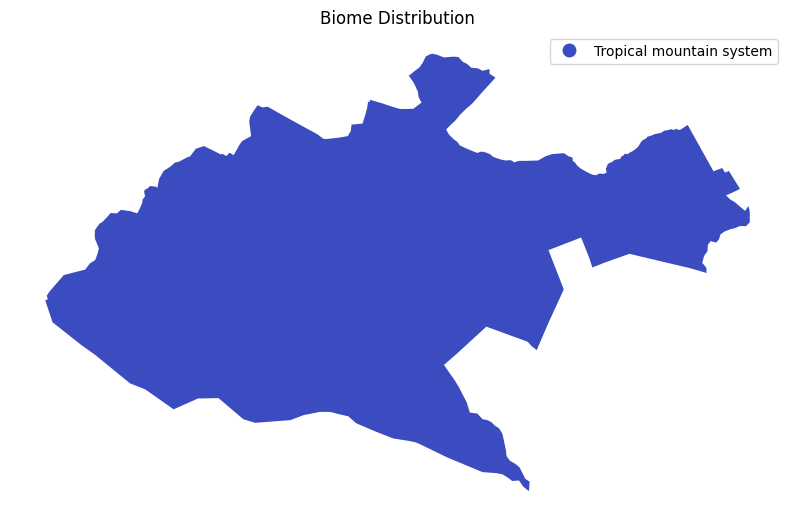

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
biome_nairobi.plot(column='gez_name', cmap='coolwarm', ax=ax,legend=True)
ax.set_title('Biome Distribution')
ax.set_axis_off()
plt.show()

However when we plot a map of Nairobi,we see that the Tropical mountain system is the most common as compared to the Kenyan map that proved tropical shrubland to be the most popular 

### FOREST TYPE DISTRIBUTION

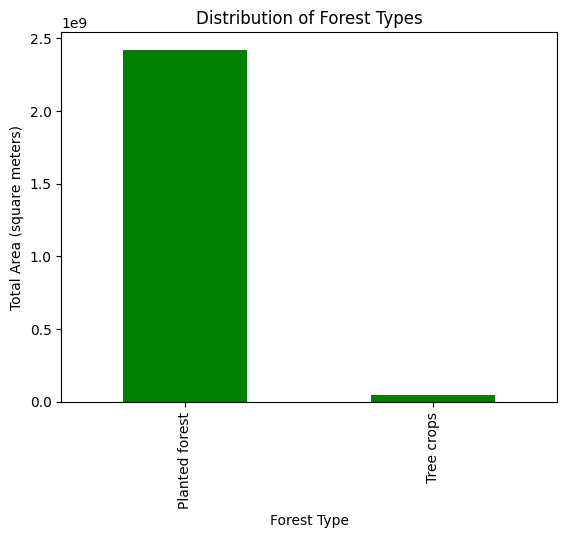

In [13]:
forest_data=gpd.read_file('Downloads/KEN_Kenya_SDPT.json')
# re-projecting the geometries to a projected CRS since its rep as lattitudes and longitudes
forest_data = forest_data.to_crs(epsg=32632)
#Calculate the area of each forest type using the area attribute of the GeoDataFrame
forest_data['area'] = forest_data.area
#Group the forest data by the plant_ag column and sum the area for each type:
forest_type = forest_data.groupby('plant_ag')['area'].sum()
#Plotting a bar graph
forest_type.plot(kind='bar', color='green')
#Title
plt.title('Distribution of Forest Types')
plt.xlabel('Forest Type')
plt.ylabel('Total Area (square meters)')
plt.show()




In [14]:
forest_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5854 entries, 0 to 5853
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   final_id       5854 non-null   object  
 1   iso            5854 non-null   object  
 2   country        5854 non-null   object  
 3   org_name       5854 non-null   object  
 4   common_name    5854 non-null   object  
 5   species        5854 non-null   object  
 6   species_simp   5854 non-null   object  
 7   plant_ag       5854 non-null   object  
 8   timber_ag      5854 non-null   object  
 9   ever_dec       5854 non-null   object  
 10  conifer_broad  5854 non-null   object  
 11  hard_soft      5854 non-null   object  
 12  size           5854 non-null   object  
 13  source         5854 non-null   object  
 14  year           5854 non-null   object  
 15  geometry       5854 non-null   geometry
 16  area           5854 non-null   float64 
dtypes: float64(1), geometry(1

Planted forests cover the most area in Kenya as compared to Tree crops

## DISTRIBUTION OF SOIL

In [15]:
soil_kenya=gpd.read_file('KEN/KEN_AL2_Kenya_WSR.json')
soil_kenya.head()

,country,ISO3166_2,name,SNAME,mg_code,IPCC,adminlevel,geometry
0,KEN,,Kenya,CL,29,Calcisol,2,"MULTIPOLYGON (((36.69084 2.83062, 36.69098 2.8..."
1,KEN,,Kenya,FR,26,Ferralsol,2,"MULTIPOLYGON (((34.11435 -0.21476, 34.11357 -0..."
2,KEN,,Kenya,LP,18,Leptosol,2,"POLYGON ((35.66344 4.61783, 35.66222 4.61778, ..."
3,KEN,,Kenya,LX,6,Lixisol,2,"MULTIPOLYGON (((39.37022 -4.65964, 39.36823 -4..."
4,KEN,,Kenya,NT,24,Nitisol,2,"MULTIPOLYGON (((39.20660 -4.67241, 39.20632 -4..."


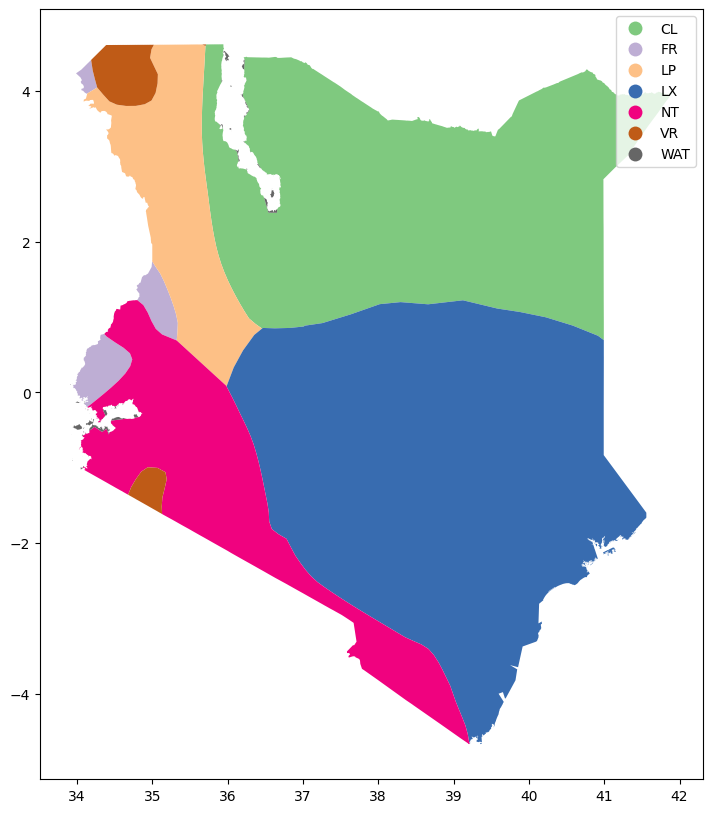

In [16]:
#Plot dynamics
fig, ax = plt.subplots(figsize=(10,10))
soil_kenya.plot(column='SNAME',cmap='Accent',ax=ax,legend=True)
plt.show()

Lx which is the short form for Lixisol can be concluded to be the most popular soil in Kenya.Let's plot a map that shows soil distribution in Nairobi to see if thats the same case

In [18]:
soil_nairobi=gpd.read_file('Downloads/KEN_AL4_Nairobi_WSR.json')
soil_nairobi.head()

,country,ISO3166_2,name,SNAME,mg_code,IPCC,adminlevel,geometry
0,KEN,KE-30,Nairobi,LX,6,Lixisol,4,"POLYGON ((37.10309 -1.26118, 37.10088 -1.26435..."


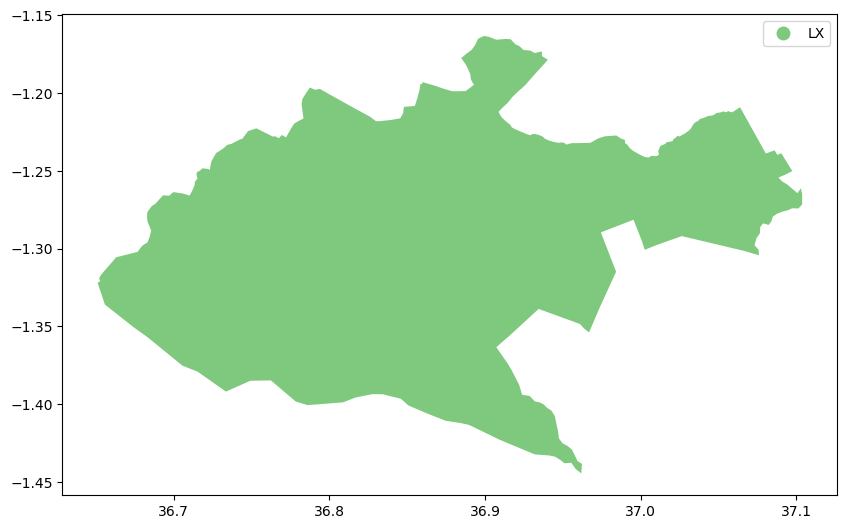

In [3]:
soil_nairobi=gpd.read_file('Downloads/KEN_AL4_Nairobi_WSR.json')
fig, ax = plt.subplots(figsize=(10,10))
soil_nairobi.plot(column='SNAME',cmap='Accent',ax=ax,legend=True)
plt.show()

Nairobi also has lixisoil as its dominant soil as seen from the above plot

#### MG_CODE DISTRIBUTION

* Lets investigate the mg_code column to see its distribution 

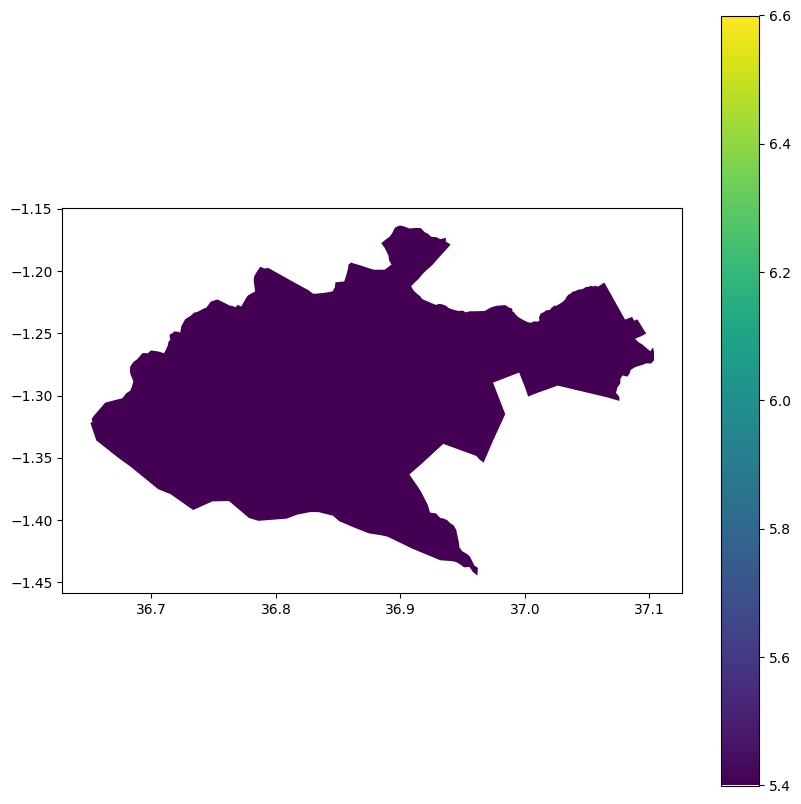

In [19]:
fig, ax = plt.subplots(figsize=(10,10))
soil_nairobi.plot(column="mg_code",cmap='viridis',legend=True,ax=ax)
plt.show()

In [20]:
kenya=gpd.read_file('Downloads/KEN_AL2_Kenya.json')
kenya.tail()

,country,ISO3166_2,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp,geometry
0,KEN,,Kenya,Kenya,Kenya,,administrative,2,Q114,en:Kenya,2019-03-22 23:19:02,"MULTIPOLYGON (((39.37506 -4.71945, 39.37096 -4..."


### CLIMATE DISTRIBUTION

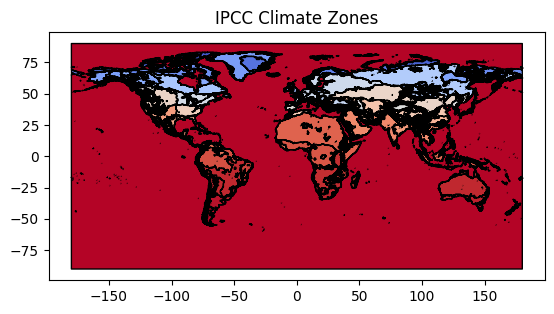

In [21]:
climate_zones=gpd.read_file('Climate/IPCC_ClimateZoneMap_Vector.geojson')
climate_zones.plot(cmap='coolwarm', edgecolor='black')
plt.title('IPCC Climate Zones')
plt.show()


### ADMINISTRATIVE BOUNDARIES

In [22]:
df_nairobi=gpd.read_file('Downloads/KEN_AL4_Nairobi.json')
df_nairobi.head()

,country,ISO3166_2,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp,geometry
0,KEN,KE-30,Nairobi,,Nairobi,,administrative,4,Q3335223,,2019-04-10 23:45:02,"POLYGON ((36.65094 -1.32191, 36.65567 -1.33597..."


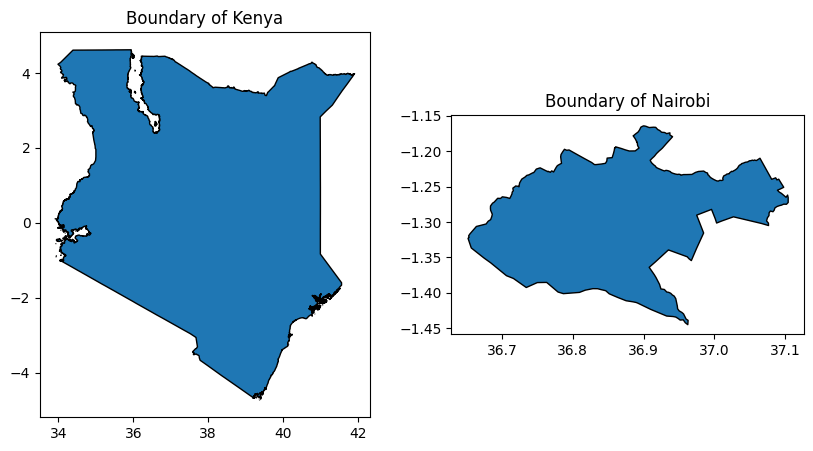

In [23]:

# Filter to keep only rows where the name is Kenya
kenya = kenya[kenya['name'] == 'Kenya']

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the boundaries of Kenya
kenya.plot(ax=axs[0], column='name', edgecolor='black')
axs[0].set_title('Boundary of Kenya')


# Plot the boundaries of Nairobi
df_nairobi.plot(ax=axs[1], column='name', edgecolor='black')
axs[1].set_title('Boundary of Nairobi');

